In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
from torch import nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

### Data handler

<AxesSubplot:>

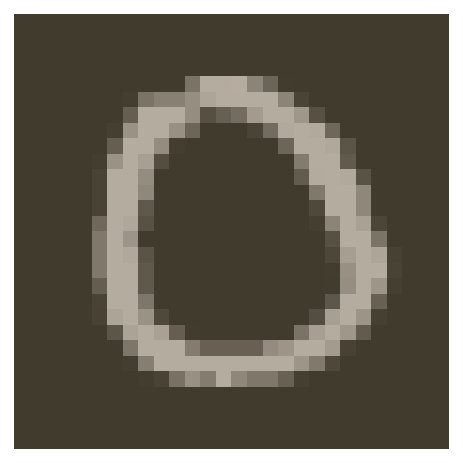

In [2]:
# Define a transformation to normalize the dataset
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))
                                ])


# Download and load the training data
trainset = datasets.MNIST("MNIST_data/", download = True, train= True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)


# Download and load the test data
testset = datasets.MNIST("MNIST_data/", download= True, train= False, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle= True)



# Creating a function to visualize the dataset
def imshow(image, ax= None, title=None, normalize=True):
  """Imshow for Tensor."""
  if ax is None:
      fig, ax = plt.subplots()
  image = image.numpy().transpose((1, 2, 0))
   
  if normalize:
      mean = np.array([0.485, 0.456, 0.406])
      std = np.array([0.229, 0.224, 0.225])
      image = std * image + mean
      image = np.clip(image, 0, 1)

  ax.imshow(image)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.tick_params(axis='both', length=0)
  ax.set_xticklabels('')
  ax.set_yticklabels('')

  return ax

image, label = next(iter(trainloader))
imshow(image[0,:])

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [7]:
len(trainloader)

938

In [8]:
labels

tensor([3, 0, 0, 0, 5, 0, 1, 1, 5, 5, 3, 6, 2, 6, 7, 5, 8, 7, 4, 3, 6, 6, 4, 0,
        6, 2, 2, 6, 3, 7, 0, 7, 6, 1, 6, 0, 8, 2, 0, 8, 8, 6, 5, 0, 1, 8, 4, 9,
        6, 6, 3, 4, 4, 4, 9, 7, 7, 5, 8, 6, 2, 3, 5, 4])

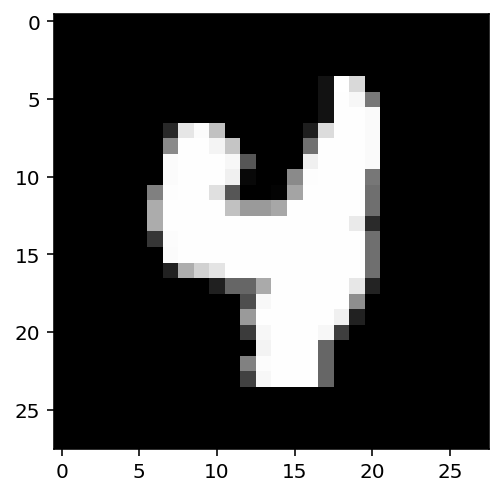

In [9]:
plt.imshow(images[63].numpy().squeeze(), cmap='Greys_r')

### CNN Model